### Символьное интегрирование в sympy

Реализация символьного интегрирования в sympy по сравнению с другими математическими пакетами на сегодняшний день не самая лучшая. Выполнена она на чистом питоне (для подстановки в уже вычисленый интеграл численных значений с произвольной точностью есть возможность задействовать оптимизацию на C, делается это прозрачным для пользователя образом через библиотеку mpmath). Для взятия интегралов рекомендуется пользоваться либо 
- (платным) пакетом **mathematica** (лучше берет интегралы) или 
- (платным) **maple** (удобнее интерфейс ввода формул), либо 
- (бесплатным) **sage** (сложно устанавливается, особенно под windows)

Save - это большой математический пакет на базе питона, основная фишка в том, что он является оберткой для нескольких платных и бесплатных библиотек. Сам по себе он GPL'ный (то есть бесплатный, но в коммерческих проектах его можно использовать с некоторыми ограничениями). Есть бесплатный сайт с интерактивным sage, правда, он иногда подтормаживает. В sage можно выбирать какое ядро использовать для символьного интегрирования: maxima(по умолчанию) или sympy, maxima лучше. Как вариант, можно использовать саму (бесплатную) **maxima** отдельно, но она написана на лиспе и её надо изучать. Просто взять интеграл - можно, а вот решить систему уравнений, записать цикл - уже сложнее. Как с питоном - взял и начал программировать - там не получится. У maxima тоже есть бесплатная online-версия без регистрации и она тоже иногда не работает.

См. отдельную презентацию по сравнению CAS (систем компьютерной алгебры) в отношении операции взятия интегралов (вкраце: условно лучше всех mathematica, затем matlab, потом maxima, и наконец, sympy и maple, хотя есть исключения: один интеграл sympy взял лучше, чем mathematica).

Впрочем, и в sympy можно взять большинство (берущихся) интегралов, встречающихся в работе (к слову, в языке **julia** в качестве библиотеки для символьных вычислений используется именно sympy). Однако здесь есть определенные «грабли», которые нужно уметь обходить.  

In [89]:
from sympy import *
init_printing()         # чтобы в notebook видеть вывод в красивом виде (latex)

Перед использованием переменных в формулах нужно их определить.  
Три альтернативные формы объявления символьных переменных:

In [111]:
x, y, s, t = symbols('x y s t')

In [112]:
var('x y s t')

In [92]:
var('a:z')

Для взятия интеграла нужно сообщить sympy, какую функцию и по какой переменной будем интегрировать:

In [93]:
integrate(cos(x), x)

Двумя строчными o обозначается бесконечность:

In [94]:
integrate(exp(-x), (x, 0, oo))

Так записывается двойной интеграл:

In [95]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

Если sympy не смог взять интеграл, он возвращается в исходном виде.

In [96]:
expr = integrate(x**x, x)
print(expr)

Integral(x**x, x)


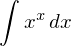

In [97]:
expr

Перед вычислением длинного интеграла, бывает полезно отобразить его в привычной  
форме при помощи латеха для проверки:

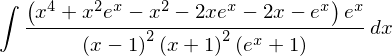

In [98]:
it = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x -
    exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
it

Затем, чтобы его вычислить (то же самое, что и integrate от исходного выражения):

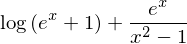

In [99]:
it.doit()

sympy «знает» некоторые специальные функции:

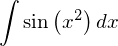

In [100]:
it = Integral(sin(x**2), x)
it

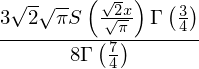

In [101]:
it.doit()

sympy умеет брать интегралы «в общем виде», сообщая при каких значениях  
параметра интеграл сходится (ну или по крайней мере он знает, как его брать).

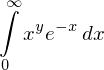

In [102]:
it = Integral(x**y*exp(-x), (x, 0, oo))
it

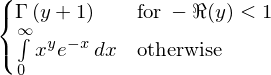

In [103]:
it.doit()

Условия (пока?) отображаются достаточно косноязычно. В данном случае  
sympy хотел сказать, что действительная часть y должна быть больше -1.

Дабы упростить жизнь движку интегрирования (и себе), если вы что-то знаете о параметрах,  
можно сообщить от этом sympy:

In [104]:
s = symbols('s', positive=True)

In [105]:
res = integrate(x**s*exp(-x), (x, 0, oo)); res

Чтобы подставить значение в уже вычисленный интеграл, используется метод subs:

In [106]:
res.subs(s,0.5)

если вам нужна б<i>о</i>льшая точность,

In [107]:
N(res.subs(s,0.5), 30)

Иногда область определения решения приобретает совсем трудночитаемый вид:

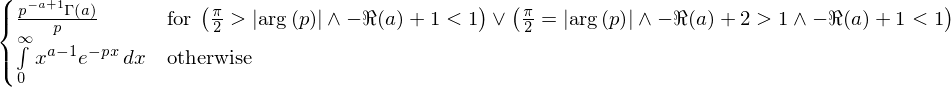

In [40]:
integrate(x**(a-1)*exp(-p*x), (x, 0, oo))

`∧` означает «и», `∨` - эти «или»; говоря `pi/2 > |arg(p)|` sympy пытается сообщить нам  
о том, что действительная часть p в данном случае должна быть строго положительна.

Опять же, если нам известно, например, что `p` заведомо действителен, ответ упростится:

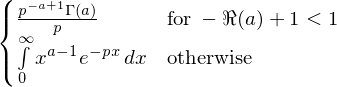

In [42]:
p = symbols('p', positive=True)
integrate(x**(a-1)*exp(-p*x), (x, 0, oo))

Здесь sympy «не хватило» на то, чтобы сократить p в числителе и знаменателе автоматически,  
можно явным образом попросить его сделать это:

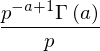

In [45]:
a = symbols('a', positive=True)
res = integrate(x**(a-1)*exp(-p*x), (x, 0, oo)); res

In [46]:
res.simplify()

Такая детализация области определения может показаться избточной, но например,  
по состоянию на ноябрь 2018, в mathematica есть баг: она не «знает» о второй  
части области определения этого интеграла:

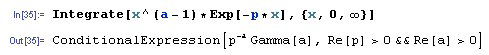

и даже
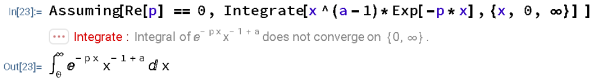

А математика - наука точная и нет гарантии, что нужный вам случай не окажется   
в отсутствующей области. Справедливости ради надо отметить, что частные случаи  
mathematica обрабатывает корректно:

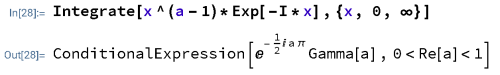

Ещё иногда в ответе появляется конструкция `polar_lift()`:

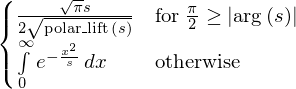

In [51]:
integrate(exp(-x**2/s),(x,0,oo))

Если вкраце, чтобы получить интеграл в смысле гланого значения её нужно «выкинуть»:

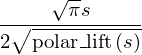

In [86]:
res = integrate(exp(-x**2/s),(x,0,oo), conds='none'); res

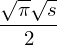

In [87]:
res.subs(polar_lift(s), s)

Либо как описывалось выше, объявить s положительной переменной.  

А вообще этот polar_lift «поднимает» переменную на риманову поверхность,  
то есть она начинает помнить, сколько оборотов она по ней прошла,  
а не только текущую проекцию полярного угла на интервал (-pi,pi] («главное значение»):

In [83]:
z = sqrt(2*I**3)
N(re(z)), N(im(z))

In [85]:
z = sqrt(2*polar_lift(I)**3)
N(re(z)), N(im(z))